In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('censusCrimeClean.csv')
pd.set_option('display.max_columns', None)
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [3]:
df.isnull().sum()

communityname          0
fold                   0
population             0
householdsize          0
racepctblack           0
                      ..
PctSameState85         0
LandArea               0
PopDens                0
PctUsePubTrans         0
ViolentCrimesPerPop    0
Length: 102, dtype: int64

In [9]:
from scipy.stats import pearsonr

list1 = df['medIncome']
list2 = df['ViolentCrimesPerPop']

corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.424


In [12]:
from scipy.stats import spearmanr

# Calculate the Spearman correlation
spearman_corr, p_value = spearmanr(list1, list2)

print("Spearman correlation coefficient: %.3f" % spearman_corr)
print("p-value:", p_value)

Spearman correlation coefficient: -0.482
p-value: 1.2978853095169542e-116


In [30]:
columns_to_compare = ["medIncome","population"]

Correlation : -0.42422061672612604


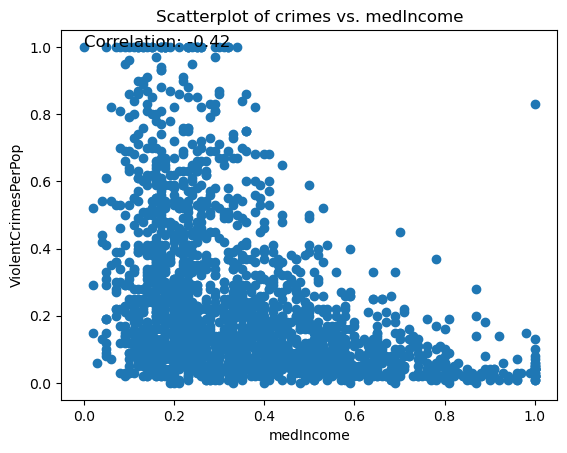

Correlation : 0.36715737827352596


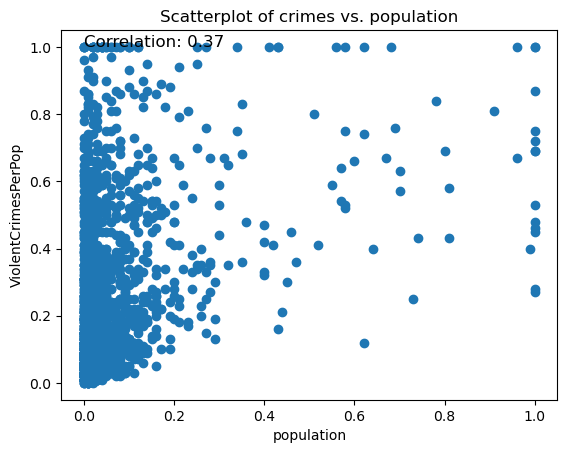

In [32]:
for column in columns_to_compare:
    # Calculate correlation coefficient
    correlation_coefficient = df["ViolentCrimesPerPop"].corr(df[column])
    print("Correlation :" ,correlation_coefficient)
    
    # Create scatterplot
    plt.scatter(df[column], df["ViolentCrimesPerPop"])
    plt.title(f"Scatterplot of crimes vs. {column}")
    plt.xlabel(column)
    plt.ylabel("ViolentCrimesPerPop")
    
    # Display correlation coefficient on the plot
    plt.text(df[column].min(), df["ViolentCrimesPerPop"].max(), f"Correlation: {correlation_coefficient:.2f}", fontsize=12)
    
    # Show the plot
    plt.show()

In [33]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
heart = heart.rename(columns={'sex': 'gender', 'target': 'hasHeartDisease'})
heart

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


In [40]:
heart['hasHeartDisease'] = heart['hasHeartDisease'].replace({0: 1, 1: 0})
heart

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


In [44]:
heart['Gender']=heart['Gender'].map({0: 'female', 1: 'male'})
heart

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hasHeartDisease
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,1


In [45]:
disease_mean = heart[heart['hasHeartDisease'] == 1 ]['trestbps'].mean()
disease_std = heart[heart['hasHeartDisease'] == 1 ]['trestbps'].std()

withoutdisease_mean = heart[heart['hasHeartDisease'] == 0 ]['trestbps'].mean()
withoutdisease_std = heart[heart['hasHeartDisease'] == 0 ]['trestbps'].std()

print("Mean of disease", disease_mean)
print("Standard deviation of disease", disease_std)
print("Mean of people without disease", withoutdisease_mean)
print("Standard deviation of people without disease", withoutdisease_std)

Mean of disease 134.3985507246377
Standard deviation of disease 18.729943961581345
Mean of people without disease 129.3030303030303
Standard deviation of people without disease 16.16961326687487


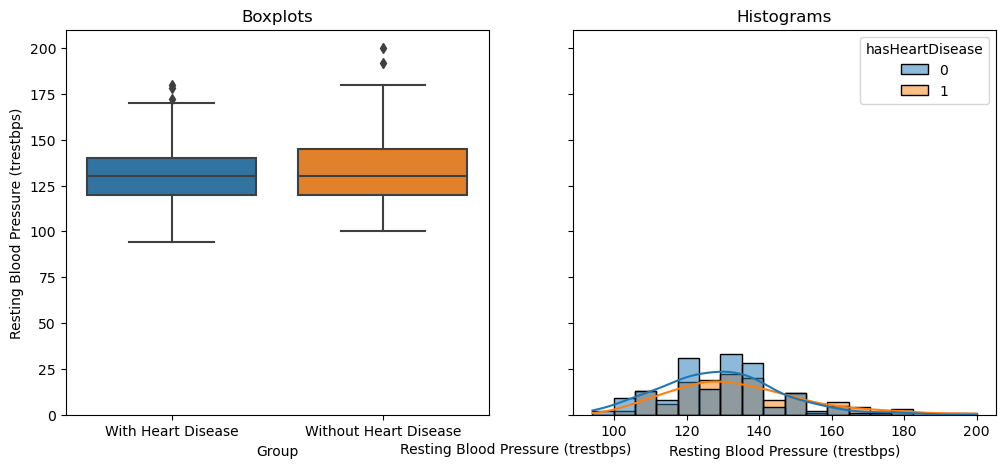

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2, sharey=True, figsize=(12, 5))

#BoxPlots
sns.boxplot(x='hasHeartDisease', y= 'trestbps', data = heart, ax=axes[0])
axes[0].set_xticklabels(['With Heart Disease', 'Without Heart Disease'])
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Resting Blood Pressure (trestbps)')
axes[0].set_title('Boxplots')

#Histograms
sns.histplot(data = heart, x ='trestbps', hue='hasHeartDisease', common_norm=False, kde = True, ax=axes[1])
axes[1].set_xlabel('Resting Blood Pressure (trestbps)')
axes[1].set_ylabel('Density')
axes[1].set_title('Histograms')


fig.text(0.5, 0.04, 'Resting Blood Pressure (trestbps)', ha = 'center' , va = 'center')
plt.show()

In [67]:
from scipy import stats

without_heartdiease = heart[heart['hasHeartDisease'] == 0]['trestbps']
with_heartdiease = heart[heart['hasHeartDisease'] == 1]['trestbps']

t_stat, p_value = stats.ttest_ind(with_heartdiease, without_heartdiease)

alpha = 0.05

print(f'Test Statistics (t) : {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print('The p-value is less than the significance level (alpha), so we reject the null hypothesis.')
    print('This siggests that there is a statistitcally significant difference in the means')
    
else:
    print('The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.')
    print('This siggests that there is not a statistitcally significant difference in the means')

Test Statistics (t) : 2.5412927171039
P-value: 0.01154605920023331
The p-value is less than the significance level (alpha), so we reject the null hypothesis.
This siggests that there is a statistitcally significant difference in the means


In [68]:
import math

n1 = len(with_heartdiease)
n2 = len(without_heartdiease)

variance = with_heartdiease.var()
variance2 = without_heartdiease.var()

pooled_std = math.sqrt(((n1-1) * variance + (n2-1) * variance2) / (n1+n2-2))

mean_diff = with_heartdiease.mean() - without_heartdiease.mean()
cohen_d = mean_diff/pooled_std

effect_size_interpretation = {
    0.2: 'Small Effect',
    0.5: 'Mediim Effect',
    0.8: 'Large Effect',
}

print(f'Cohen\'s d: {cohen_d}')
for effect_size, interpretation in effect_size_interpretation.items():
    if abs(cohen_d) >= effect_size:
        print(f'Interpretation: {interpretation}')
        break

Cohen's d: 0.2931530998143617
Interpretation: Small Effect


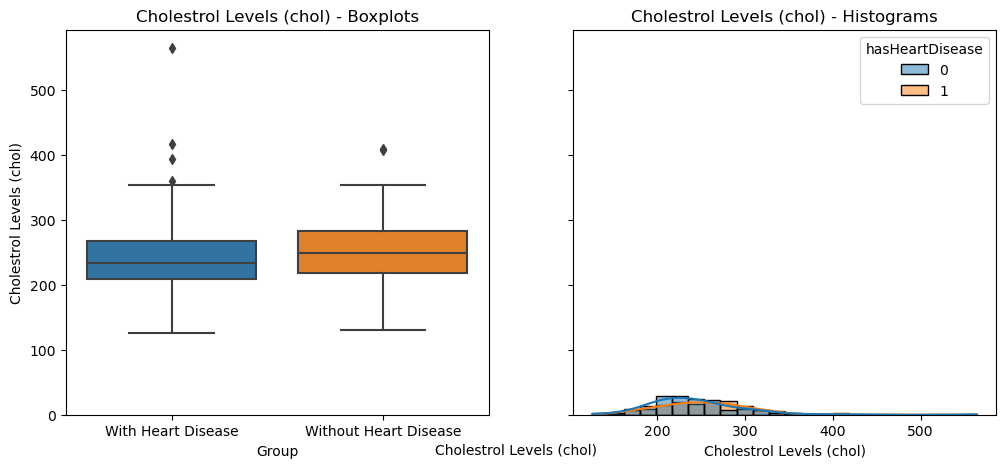

In [69]:
fig,axes = plt.subplots(1,2, sharey=True, figsize=(12, 5))

#BoxPlots
sns.boxplot(x='hasHeartDisease', y= 'chol', data = heart, ax=axes[0])
axes[0].set_xticklabels(['With Heart Disease', 'Without Heart Disease'])
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Cholestrol Levels (chol)')
axes[0].set_title('Cholestrol Levels (chol) - Boxplots')

#Histograms
sns.histplot(data = heart, x ='chol', hue='hasHeartDisease', common_norm=False, kde = True, ax=axes[1])
axes[1].set_xlabel('Cholestrol Levels (chol)')
axes[1].set_ylabel('Density')
axes[1].set_title('Cholestrol Levels (chol) - Histograms')


fig.text(0.5, 0.04, 'Cholestrol Levels (chol)', ha = 'center' , va = 'center')
plt.show()